# Generate H5AD Input

2021-06-20

In [1]:
# Import Packages

%load_ext autoreload
%autoreload 2

import os
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from anndata import AnnData

# Customized packages
import starmap.sc_util as su

# test()

## Input

In [2]:
# Set path
base_path = 'Z:/Data/Analyzed/2021-05-02-Rena-Hela-EU/'
out_path = os.path.join(base_path, 'output')
fig_path = os.path.join(base_path, 'figures')
if not os.path.exists(fig_path):
    os.mkdir(fig_path)

# Load whole cell data
primary_dataset = 'whole_cell'
expr_path = os.path.join(out_path, primary_dataset, 'complete_cell_barcode_count.csv')
var_path = os.path.join(out_path, primary_dataset, 'cell_barcode_names.csv')
obs_path = os.path.join(out_path, primary_dataset, 'complete_meta.csv')

# Add expression data to the AnnData object 
expr_x = np.loadtxt(expr_path, delimiter=',')
var = pd.read_csv(var_path, header=None)
var = pd.DataFrame(index=var.iloc[:,2].to_list())
obs = pd.read_csv(obs_path, index_col=0)

adata = AnnData(X=expr_x, var=var, obs=obs)

In [3]:
adata

AnnData object with n_obs × n_vars = 12750 × 998
    obs: 'orig_index', 'sample', 'volume', 'x', 'y', 'z'

In [4]:
# Load nucleus data
primary_dataset = 'nucleus'
expr_path = os.path.join(out_path, primary_dataset, 'complete_cell_barcode_count.csv')
var_path = os.path.join(out_path, primary_dataset, 'cell_barcode_names.csv')
obs_path = os.path.join(out_path, primary_dataset, 'complete_meta.csv')

# Add expression data to the AnnData object 
expr_x = np.loadtxt(expr_path, delimiter=',')
var = pd.read_csv(var_path, header=None)
var = pd.DataFrame(index=var.iloc[:,2].to_list())
obs = pd.read_csv(obs_path, index_col=0)

nucdata = AnnData(X=expr_x, var=var, obs=obs)

In [5]:
# Load cytoplasm data
primary_dataset = 'cytoplasm'
expr_path = os.path.join(out_path, primary_dataset, 'complete_cell_barcode_count.csv')
var_path = os.path.join(out_path, primary_dataset, 'cell_barcode_names.csv')
obs_path = os.path.join(out_path, primary_dataset, 'complete_meta.csv')

# Add expression data to the AnnData object 
expr_x = np.loadtxt(expr_path, delimiter=',')
var = pd.read_csv(var_path, header=None)
var = pd.DataFrame(index=var.iloc[:,2].to_list())
obs = pd.read_csv(obs_path, index_col=0)

cytodata = AnnData(X=expr_x, var=var, obs=obs)

In [6]:
# Load outer_cytoplasm data
primary_dataset = 'outer_cytoplasm'
expr_path = os.path.join(out_path, primary_dataset, 'complete_cell_barcode_count.csv')
var_path = os.path.join(out_path, primary_dataset, 'cell_barcode_names.csv')
obs_path = os.path.join(out_path, primary_dataset, 'complete_meta.csv')

# Add expression data to the AnnData object 
expr_x = np.loadtxt(expr_path, delimiter=',')
var = pd.read_csv(var_path, header=None)
var = pd.DataFrame(index=var.iloc[:,2].to_list())
obs = pd.read_csv(obs_path, index_col=0)

out_cytodata = AnnData(X=expr_x, var=var, obs=obs)

In [7]:
# Load er data
primary_dataset = 'er'
expr_path = os.path.join(out_path, primary_dataset, 'complete_cell_barcode_count.csv')
var_path = os.path.join(out_path, primary_dataset, 'cell_barcode_names.csv')
obs_path = os.path.join(out_path, primary_dataset, 'complete_meta.csv')

# Add expression data to the AnnData object 
expr_x = np.loadtxt(expr_path, delimiter=',')
var = pd.read_csv(var_path, header=None)
var = pd.DataFrame(index=var.iloc[:,2].to_list())
obs = pd.read_csv(obs_path, index_col=0)

erdata = AnnData(X=expr_x, var=var, obs=obs)

## QC

In [8]:
# Remove cells without ER structure 
cells_to_keep = erdata.obs['volume'] != 0 

# Subset 
adata = adata[cells_to_keep, ]
adata.layers['nucleus'] = nucdata[cells_to_keep, ].X
adata.layers['cytoplasm'] = cytodata[cells_to_keep, ].X
adata.layers['er'] = erdata[cells_to_keep, ].X
adata.layers['outer_cytoplasm'] = out_cytodata[cells_to_keep, ].X

### 05-02

In [9]:
# Remove cells out of focus in 20h_labeling (Position057.tif; ; (8014.346083061577, 2705.8239016596))
temp_df = adata.obs.loc[adata.obs['sample'] == '20h_labeling', ]
cells_to_remove = temp_df.loc[(temp_df.x > 8014) & (temp_df.x < 9510) & (temp_df.y > 2706) & (temp_df.y < 4202), ].index
adata = adata[~adata.obs.index.isin(cells_to_remove), ]

### 07-16

In [35]:
# Remove cells out of focus in 1h_labeling (y=2831, x=1498) (4178, 2836)
temp_df = adata.obs.loc[adata.obs['sample'] == '1h_labeling', ]
cells_to_remove = temp_df.loc[(temp_df.x > 1498) & (temp_df.x < 2836) & (temp_df.y > 2831) & (temp_df.y < 4178), ].index
adata = adata[~adata.obs.index.isin(cells_to_remove), ]

In [36]:
# Remove cells out of focus in 1h_labeling 2h wash (y=8207, x=4162) (9563, 5539)
temp_df = adata.obs.loc[adata.obs['sample'] == '1h_labeling_2h_wash', ]
cells_to_remove = temp_df.loc[(temp_df.x > 4162) & (temp_df.x < 5539) & (temp_df.y > 8207) & (temp_df.y < 9563), ].index
# temp_df.loc[(temp_df.x > 4162) & (temp_df.x < 5539) & (temp_df.y > 8207) & (temp_df.y < 9563), ]
adata = adata[~adata.obs.index.isin(cells_to_remove), ]

In [37]:
# Remove cells out of focus in 1h_labeling 4h wash
temp_df = adata.obs.loc[adata.obs['sample'] == '1h_labeling_4h_wash', ]
cells_to_remove = temp_df.loc[(temp_df.x > 1) & (temp_df.x < 1600) & (temp_df.y > 1) & (temp_df.y < 1600), ].index
# temp_df.loc[(temp_df.x > 1) & (temp_df.x < 1600) & (temp_df.y > 1) & (temp_df.y < 1600), ]
adata = adata[~adata.obs.index.isin(cells_to_remove), ]

In [10]:
adata

View of AnnData object with n_obs × n_vars = 12736 × 998
    obs: 'orig_index', 'sample', 'volume', 'x', 'y', 'z'
    layers: 'nucleus', 'cytoplasm', 'er', 'outer_cytoplasm'

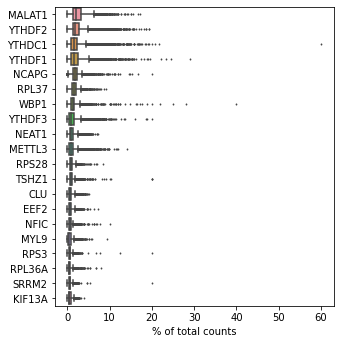

In [11]:
# Plot top 20 most expressed genes 
sc.pl.highest_expr_genes(adata, n_top=20)

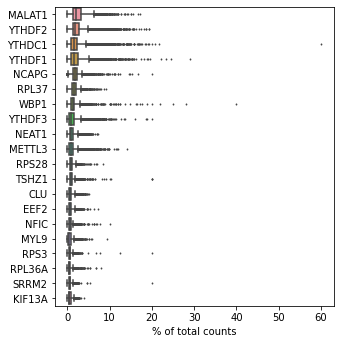

In [12]:
# Plot top 20 most expressed genes 
sc.pl.highest_expr_genes(adata, n_top=20)

## Regular Filtration

In [13]:
# Calculate QC metrics
sc.pp.calculate_qc_metrics(adata, percent_top=None, inplace=True)
# Calculate max count for each gene
adata.var['max_counts'] = adata.X.max(axis=0)

In [14]:
# Filter cell by area 
# adata = su.filter_cells_by_area(adata, min_area=1000, max_area=100000, save=False)

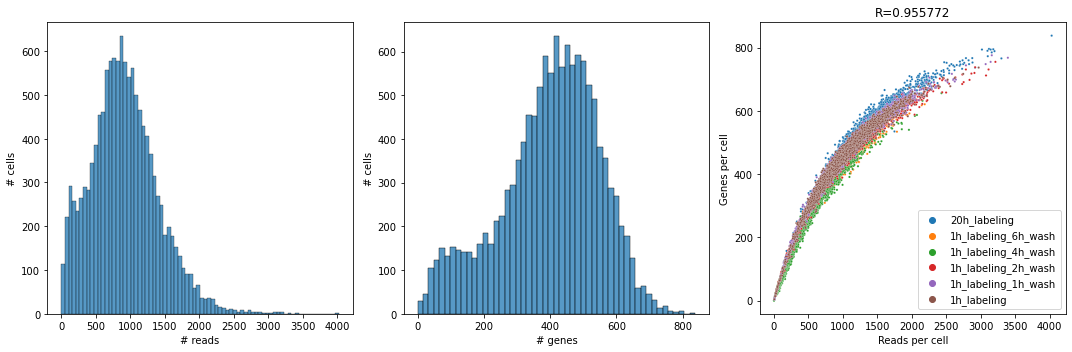

In [15]:
# Per-cell Stats Plot
su.plot_stats_per_cell(adata, save=False)

... storing 'sample' as categorical


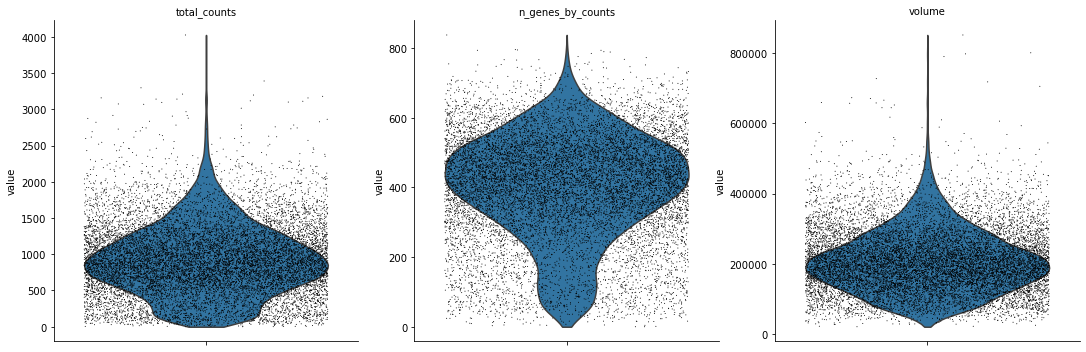

In [16]:
sc.pl.violin(adata, ['total_counts', 'n_genes_by_counts', 'volume'],
             jitter=0.4, multi_panel=True)

In [36]:
# Check reads per cell interactively 
import pandas_bokeh
adata.obs.loc[:, ['total_counts']].plot_bokeh.hist(
    bins=np.linspace(0, 8000, 500),
    vertical_xlabel=True,
    hovertool=True,
    line_color="black")

ModuleNotFoundError: No module named 'pandas_bokeh'

In [17]:
# Get quantiles of reads
su.show_reads_quantile(adata)

Reads per cell quantile:
0.10     293.0
0.25     588.0
0.50     886.0
0.75    1210.0
0.90    1554.0
Name: total_counts, dtype: float64


In [18]:
# Filtration 
sc.pp.filter_cells(adata, min_genes=10)
sc.pp.filter_genes(adata, min_cells=10)

# Filter gene by max counts 
# adata = adata[:, adata.var['max_counts'] > 2]
# adata.var['detected'] = adata.var['max_counts'] > 2
# adata.var['highly_variable'] = adata.var['max_counts'] > 2

sc.pp.filter_cells(adata, min_counts=300)
# sc.pp.filter_cells(adata, max_counts=4000)

adata

AnnData object with n_obs × n_vars = 11427 × 998
    obs: 'orig_index', 'sample', 'volume', 'x', 'y', 'z', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'max_counts', 'n_cells'
    layers: 'nucleus', 'cytoplasm', 'er', 'outer_cytoplasm'

## Output

In [19]:
# Set category order 
sample_order = ['20h_labeling',
                '1h_labeling',
               '1h_labeling_1h_wash',
               '1h_labeling_2h_wash',
               '1h_labeling_4h_wash',
               '1h_labeling_6h_wash']

condition_order = ['20h labeling',
                   '1h labeling',
                   '1h labeling, 1h wash',
                   '1h labeling, 2h wash',
                   '1h labeling, 4h wash',
                   '1h labeling, 6h wash']

condition_dict = dict(zip(sample_order, condition_order))
adata.obs['condition'] = adata.obs['sample']
adata.obs['condition'] = adata.obs['condition'].map(condition_dict)
adata.obs['sample'] = adata.obs['sample'].cat.reorder_categories(sample_order)
adata.obs['condition'] = adata.obs['condition'].cat.reorder_categories(condition_order)

In [20]:
from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')
adata.write_h5ad(os.path.join(out_path, f"{date}-Rena-EU-starmap-after-pp-300.h5ad"))

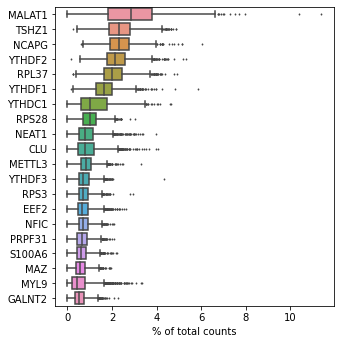

In [53]:
sdata = adata[adata.obs['sample'] == '1h_labeling_6h_wash',]

sc.pl.highest_expr_genes(sdata, n_top=20)

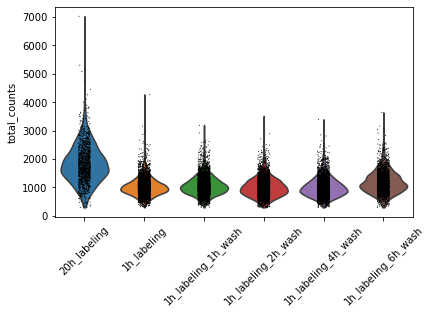

In [50]:
sc.pl.violin(adata, 'total_counts', groupby='sample', rotation=45)

In [54]:
test = adata.obs['sample'].value_counts()
test = pd.DataFrame(test)

In [57]:
test['count'] = test['sample']
test['sample'] = test.index

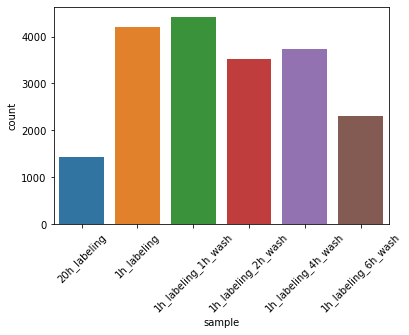

In [66]:
sns.barplot(x='sample', y='count', data=test)
plt.xticks(rotation=45)
plt.show()